# Prediction Model



In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# %matplotlib notebook

In [2]:
# The first step is to retrieve cleaned data 
df = pd.read_csv('./dataset/immoCollect52house-clean.csv', index_col = 0)

## Cleaning / manipulation 

First, I'm going to do a little data cleansing to make sure that it corresponds precisely to my expectations for this project.

In [3]:
print(df.shape)
df.head()

(19788, 18)


,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,number_of_facades,swimming_pool,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
6,1650,525000,4,220,1,1,1,4,0,1,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,549000,4,210,1,1,1,4,0,1,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,519000,3,273,1,0,1,4,0,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,535000,4,200,1,1,1,4,0,1,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
19,7850,550000,4,276,1,1,1,4,0,1,Enghien,Ath,hainaut,6.0,wallonie,1.0,9.0,-2.097867


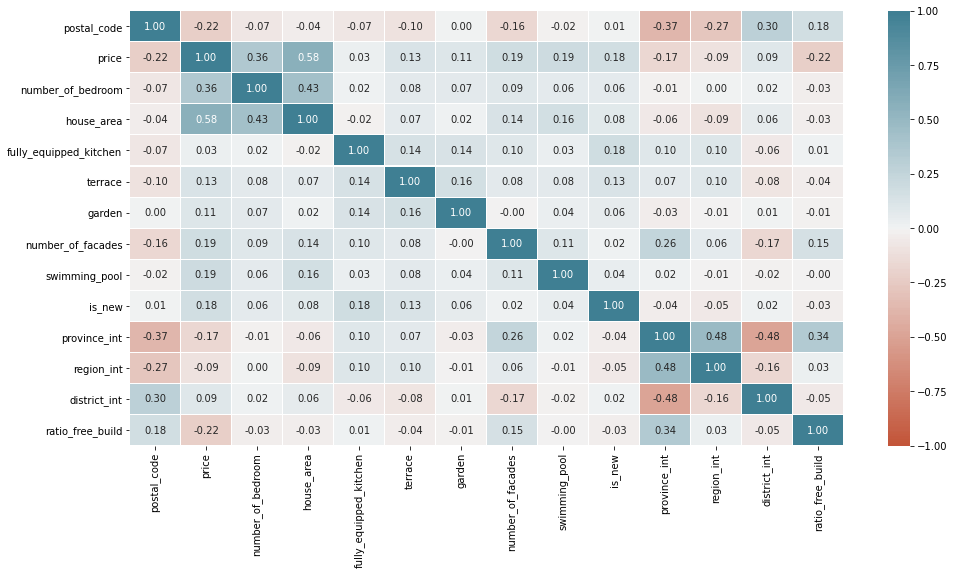

In [4]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [5]:
# I retrieve only utils columns for my model
ratio_fb = df['ratio_free_build']
df = df.iloc[:,0:9]
df['ratio_free_build'] = ratio_fb
# df = df.drop(columns=['fully_equipped_kitchen'])

In [6]:
cols = df.columns.tolist()
print(cols)
# cols = cols[0:] + cols[:-1]
# df = df[cols]

['postal_code', 'price', 'number_of_bedroom', 'house_area', 'fully_equipped_kitchen', 'terrace', 'garden', 'number_of_facades', 'swimming_pool', 'ratio_free_build']


In [7]:
df.head()

,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,number_of_facades,swimming_pool,ratio_free_build
6,1650,525000,4,220,1,1,1,4,0,-2.851322
9,1332,549000,4,210,1,1,1,4,0,-3.410265
10,8310,519000,3,273,1,0,1,4,0,-2.429051
12,8200,535000,4,200,1,1,1,4,0,-2.429051
19,7850,550000,4,276,1,1,1,4,0,-2.097867


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19788 entries, 6 to 59161
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postal_code             19788 non-null  int64  
 1   price                   19788 non-null  int64  
 2   number_of_bedroom       19788 non-null  int64  
 3   house_area              19788 non-null  int64  
 4   fully_equipped_kitchen  19788 non-null  int64  
 5   terrace                 19788 non-null  int64  
 6   garden                  19788 non-null  int64  
 7   number_of_facades       19788 non-null  int64  
 8   swimming_pool           19788 non-null  int64  
 9   ratio_free_build        19788 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 1.7 MB


### Testing boxcox

(array([ 195.,  299.,  477.,  426.,  809.,  762.,  786., 1006.,  766.,
        1078., 1200., 1002., 1288., 1268.,  845.,  895.,  849.,  764.,
         531.,  631.,  406.,  278.,  397.,  241.,  449.,   39.,  182.,
         233.,  101.,  175.,  179.,   97.,   78.,  170.,   85.,  134.,
          40.,   38.,   96.,   40.,   38.,  113.,   13.,   50.,   70.,
          29.,   67.,   13.,   23.,   37.]),
 array([ 52000.,  69960.,  87920., 105880., 123840., 141800., 159760.,
        177720., 195680., 213640., 231600., 249560., 267520., 285480.,
        303440., 321400., 339360., 357320., 375280., 393240., 411200.,
        429160., 447120., 465080., 483040., 501000., 518960., 536920.,
        554880., 572840., 590800., 608760., 626720., 644680., 662640.,
        680600., 698560., 716520., 734480., 752440., 770400., 788360.,
        806320., 824280., 842240., 860200., 878160., 896120., 914080.,
        932040., 950000.]),
 <BarContainer object of 50 artists>)

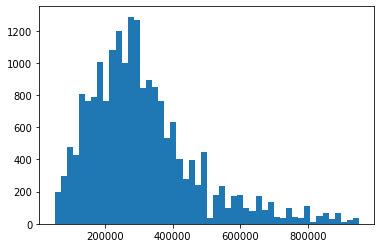

In [9]:
plt.hist(df['price'], 50)

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

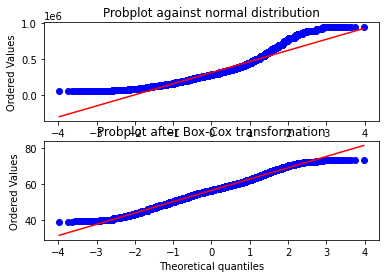

In [10]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox

POWER = 0.2

fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(df['price'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt = boxcox(df['price'],POWER)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

In [11]:
price_temp = boxcox(df['price'],POWER )

(array([  36.,   59.,   61.,   74.,   75.,   96.,   93.,  131.,  270.,
          85.,  206.,  211.,  395.,  413.,  462.,  426.,  416.,  532.,
         517.,  676.,  454.,  905.,  610., 1012.,  965., 1116., 1130.,
         798.,  979.,  946.,  686.,  939.,  305.,  407.,  480.,  369.,
         348.,  217.,  301.,  300.,  153.,  222.,  151.,  146.,  130.,
          85.,  139.,   98.,  102.,   61.]),
 array([38.87030695, 39.56161824, 40.25292952, 40.94424081, 41.6355521 ,
        42.32686339, 43.01817467, 43.70948596, 44.40079725, 45.09210854,
        45.78341982, 46.47473111, 47.1660424 , 47.85735369, 48.54866498,
        49.23997626, 49.93128755, 50.62259884, 51.31391013, 52.00522141,
        52.6965327 , 53.38784399, 54.07915528, 54.77046656, 55.46177785,
        56.15308914, 56.84440043, 57.53571171, 58.227023  , 58.91833429,
        59.60964558, 60.30095686, 60.99226815, 61.68357944, 62.37489073,
        63.06620201, 63.7575133 , 64.44882459, 65.14013588, 65.83144716,
        66.52275

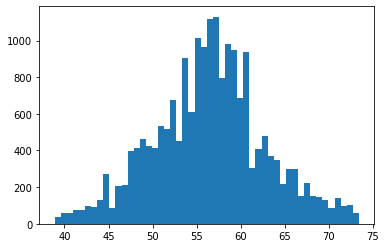

In [12]:
plt.hist(price_temp, 50)

In [13]:
price_temp.skew()

0.0358613291361834

### Applying to my DF

In [14]:
# df['price'] = boxcox(df['price'], POWER)

In [15]:
df['price'].skew()

1.239288276761603

In [16]:
# df['price'] = inv_boxcox(df['price'], POWER)

In [17]:
df['price'].skew()

1.239288276761603

Pour le coup cela n'augmente pas mon score

## Let's train and predict for HOUSE !

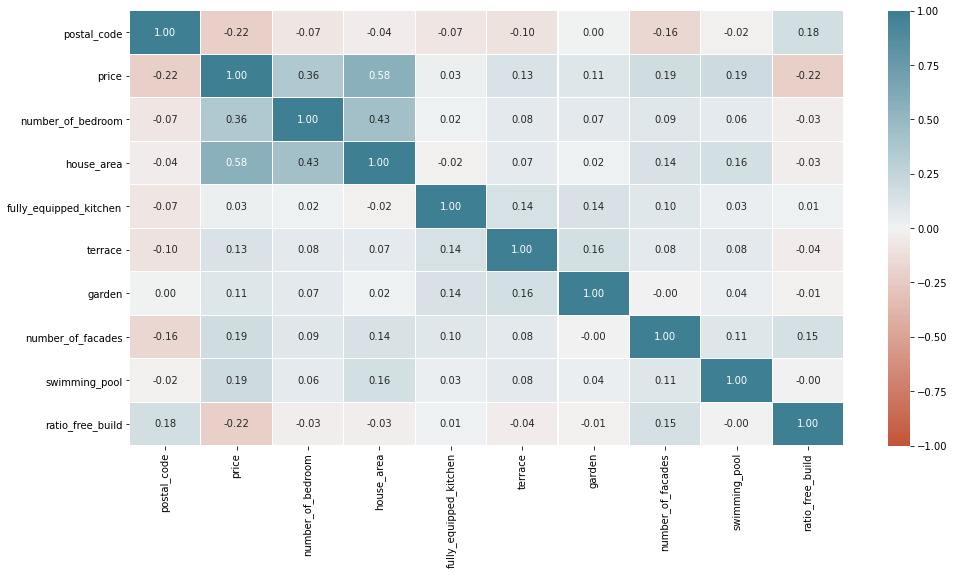

In [18]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [19]:
X = df.drop(columns=['price'])
X.head()

,postal_code,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,number_of_facades,swimming_pool,ratio_free_build
6,1650,4,220,1,1,1,4,0,-2.851322
9,1332,4,210,1,1,1,4,0,-3.410265
10,8310,3,273,1,0,1,4,0,-2.429051
12,8200,4,200,1,1,1,4,0,-2.429051
19,7850,4,276,1,1,1,4,0,-2.097867


In [20]:
y = df[['price']]
y.head()

,price
6,525000
9,549000
10,519000
12,535000
19,550000


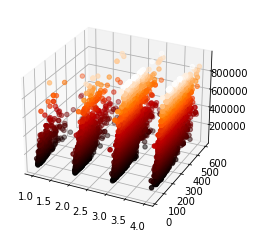

In [21]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( X['number_of_bedroom'],X['house_area'], y, c=y, cmap='gist_heat')
ax.view_init(27, -64)

### Split the dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [23]:
X_test

,postal_code,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,garden,number_of_facades,swimming_pool,ratio_free_build
42078,4287,4,353,1,0,0,2,0,-1.861387
54962,2610,3,150,1,0,1,1,0,-2.314025
4986,1700,3,225,1,1,1,4,0,-2.863048
3670,7620,4,410,1,1,1,4,0,-1.611101
50529,4610,3,125,1,1,1,3,0,-3.112351
...,...,...,...,...,...,...,...,...,...
42190,4217,3,304,1,0,0,4,0,-1.758649
753,9200,3,232,0,1,0,1,0,-2.522504
34173,4100,3,106,0,0,0,2,0,-2.719016
48992,9000,3,124,0,1,1,1,0,-2.657320


### Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 1. Multiple Linear regression

In [25]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train) # Entrainement du model

LinearRegression()

In [26]:
score = regressor.score(X_train,y_train)
score

0.44396160343065294

In [27]:
score = regressor.score(X_test,y_test)
score

0.4434884617563326

### 2. With polynomial regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 4

pipe=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [29]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [30]:
pipe.score(X_train, y_train)

0.6265081241099468

In [31]:
pipe.score(X_test, y_test)

0.5800977483494489

### 3. KNN Regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [33]:
knn.score(X_train, y_train)

0.6513863000240607

In [34]:
knn.score(X_test, y_test)

0.5593750948818295

### 4. Decision Trees

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

In [36]:
regressor.score(X_train, y_train)

0.7122095708101095

In [37]:
regressor.score(X_test, y_test)

0.5975007800614963

### 5. Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=6, random_state=42)
regr.fit(X, y)

<ipython-input-38-2e99fa92c08c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


RandomForestRegressor(max_depth=6, random_state=42)

In [39]:
regr.score(X_train, y_train)

-0.306011492193782

In [40]:
regr.score(X_test, y_test)

-0.26965970484512924

In [41]:
y_pred = regr.predict(X_test)
r2_score(y_test, y_pred)

-0.26965970484512924

### 6.Gradient boost

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42, n_estimators=3000, learning_rate=0.01, max_depth=5)
reg.fit(X_train, y_train)

/home/leersla/Desktop/Turing4/ImmoEliza-API/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=3000,
                          random_state=42)

In [43]:
reg.score(X_train, y_train)

0.8047646542010434

In [44]:
reg.score(X_test, y_test)

0.7222397385151584

### 7. XGB

In [45]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(booster='gbtree', objective="reg:squarederror", random_state=42, n_estimators=3000,
                             learning_rate=0.01, max_depth=5, eta=0.01)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
xgb_model.score(X_train, y_train)

0.7970933710825705

In [47]:
xgb_model.score(X_test, y_test)

0.7202617432455503

In [48]:
y_pred = xgb_model.predict(X_test)
r2_score(y_test, y_pred)


0.7202617432455503

### CatBoostRegressor

In [49]:
from catboost import CatBoostRegressor

cbr_model = CatBoostRegressor(learning_rate=0.01, depth=7, iterations=10000, random_seed=42, loss_function='RMSE', od_type='Iter')
fit_model = cbr_model.fit(X_train,
                          y_train,
                          eval_set=(X_test, y_test),
                          use_best_model=True,
                          early_stopping_rounds=10,
                          verbose=100)

print(fit_model.get_params())

0:	learn: 161304.1025968	test: 156704.2620041	best: 156704.2620041 (0)	total: 58.3ms	remaining: 9m 42s
100:	learn: 116303.0690088	test: 113526.2219039	best: 113526.2219039 (100)	total: 584ms	remaining: 57.2s
200:	learn: 103945.0323855	test: 102820.3835134	best: 102820.3835134 (200)	total: 1.11s	remaining: 54.2s
300:	learn: 99083.2504010	test: 98791.8472375	best: 98791.8472375 (300)	total: 1.65s	remaining: 53s
400:	learn: 96218.2577793	test: 96499.3647616	best: 96499.3647616 (400)	total: 2.17s	remaining: 51.9s
500:	learn: 94278.6350936	test: 94994.8371643	best: 94994.8371643 (500)	total: 2.69s	remaining: 50.9s
600:	learn: 92902.6924838	test: 93982.9161983	best: 93982.9161983 (600)	total: 3.2s	remaining: 50.1s
700:	learn: 91806.8201209	test: 93244.0092879	best: 93244.0092879 (700)	total: 3.72s	remaining: 49.4s
800:	learn: 90872.3551519	test: 92545.4630677	best: 92545.4630677 (800)	total: 4.28s	remaining: 49.2s
900:	learn: 90033.6368772	test: 91929.2023449	best: 91929.2023449 (900)	total:

In [50]:
fit_model.score(X_test, y_test)

-3330.361582580281

In [51]:
y_pred = fit_model.predict(X_train)
r2_score(y_train, y_pred)

0.7662994298039323

In [52]:
y_pred = fit_model.predict(X_test)
r2_score(y_test, y_pred)

0.7007448948333594

## Pickle it

In [53]:
# import pickle
# tup = (xgb_model, ss)
# pickle.dump(tup, open("model_bin/house_model.p", "wb" ))